# 6.1 Метод Кэнни

In [59]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [60]:
img = cv.imread('cards.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

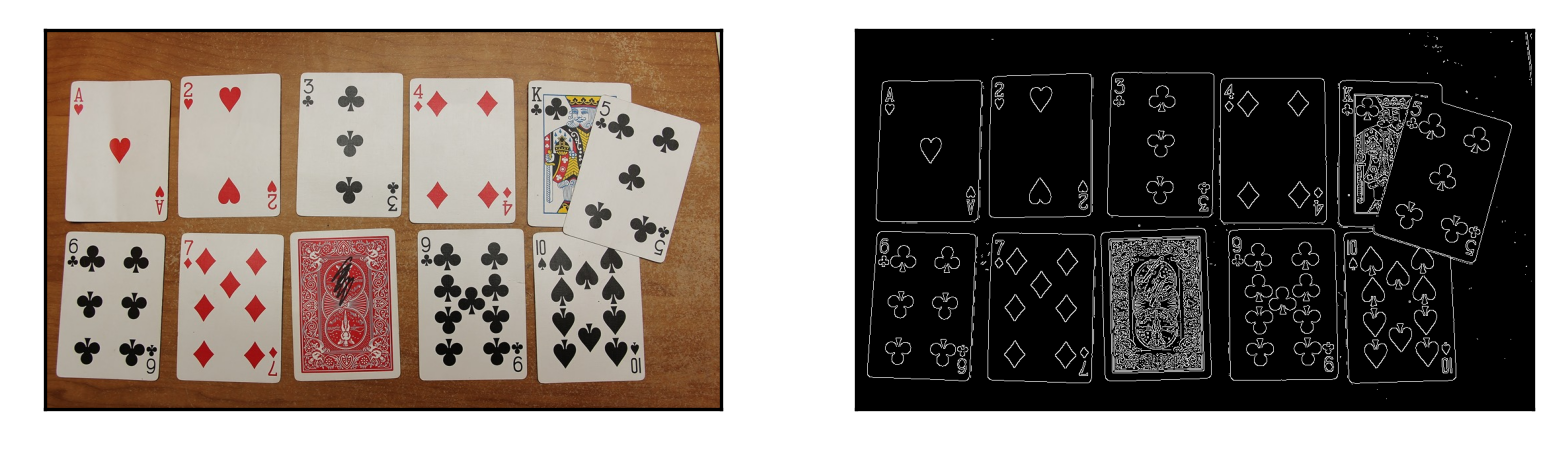

In [61]:
plt.rcParams['figure.dpi'] = 300
canny = cv.Canny(img, 200, 250)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(canny, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

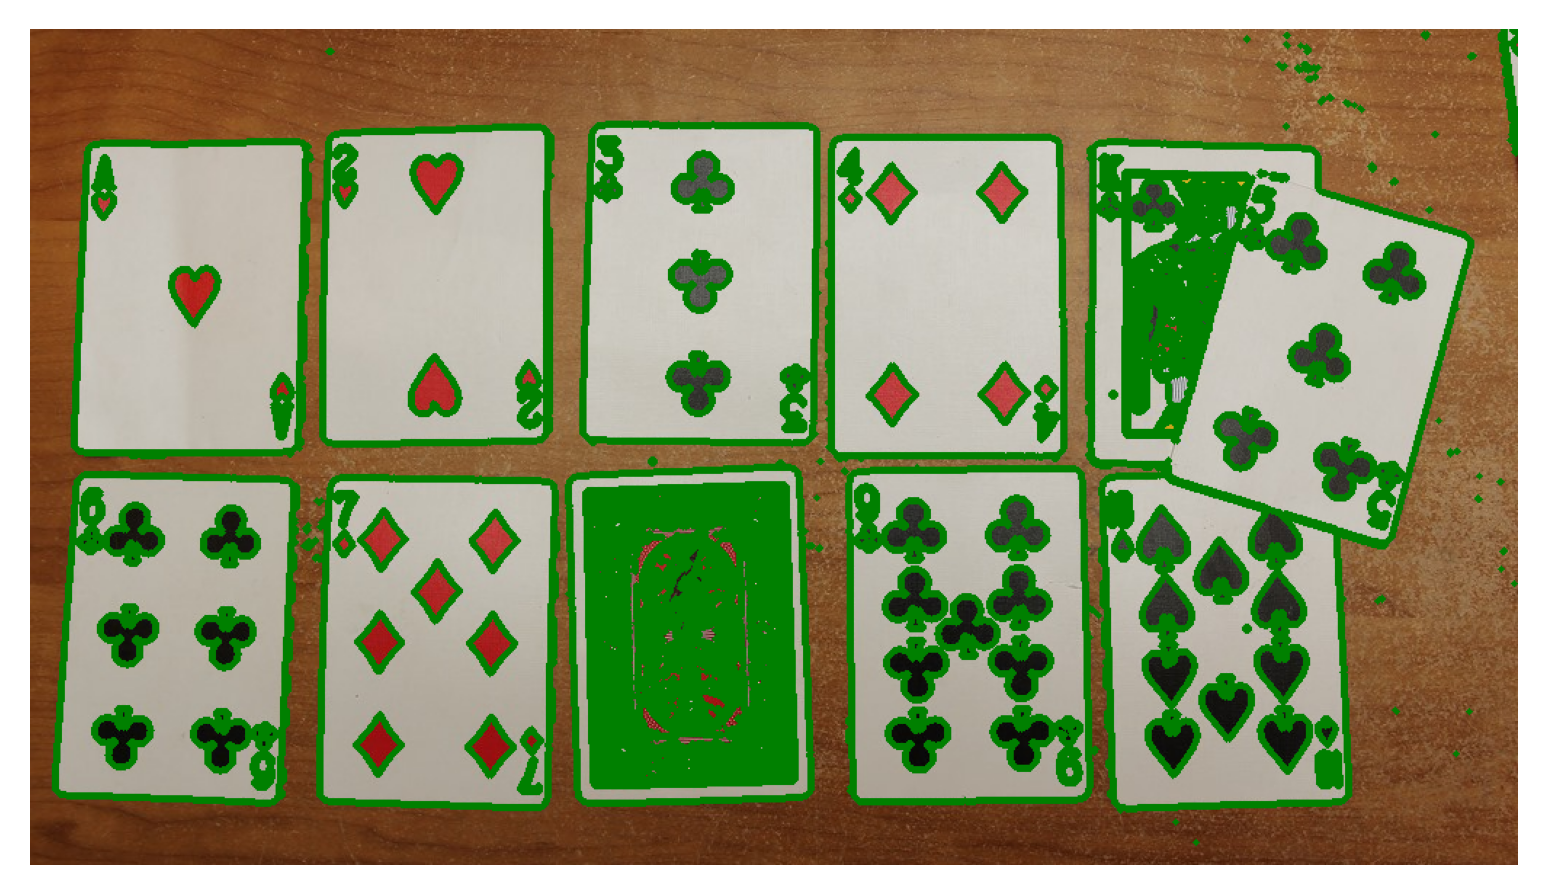

In [62]:
contours, hierarchy = cv.findContours(canny, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, -1, (0, 128, 0), 3)
plt.imshow(img)
plt.axis('off')
plt.show()

# 6.2. Определение размера объекта


78.15896739130434 %
big


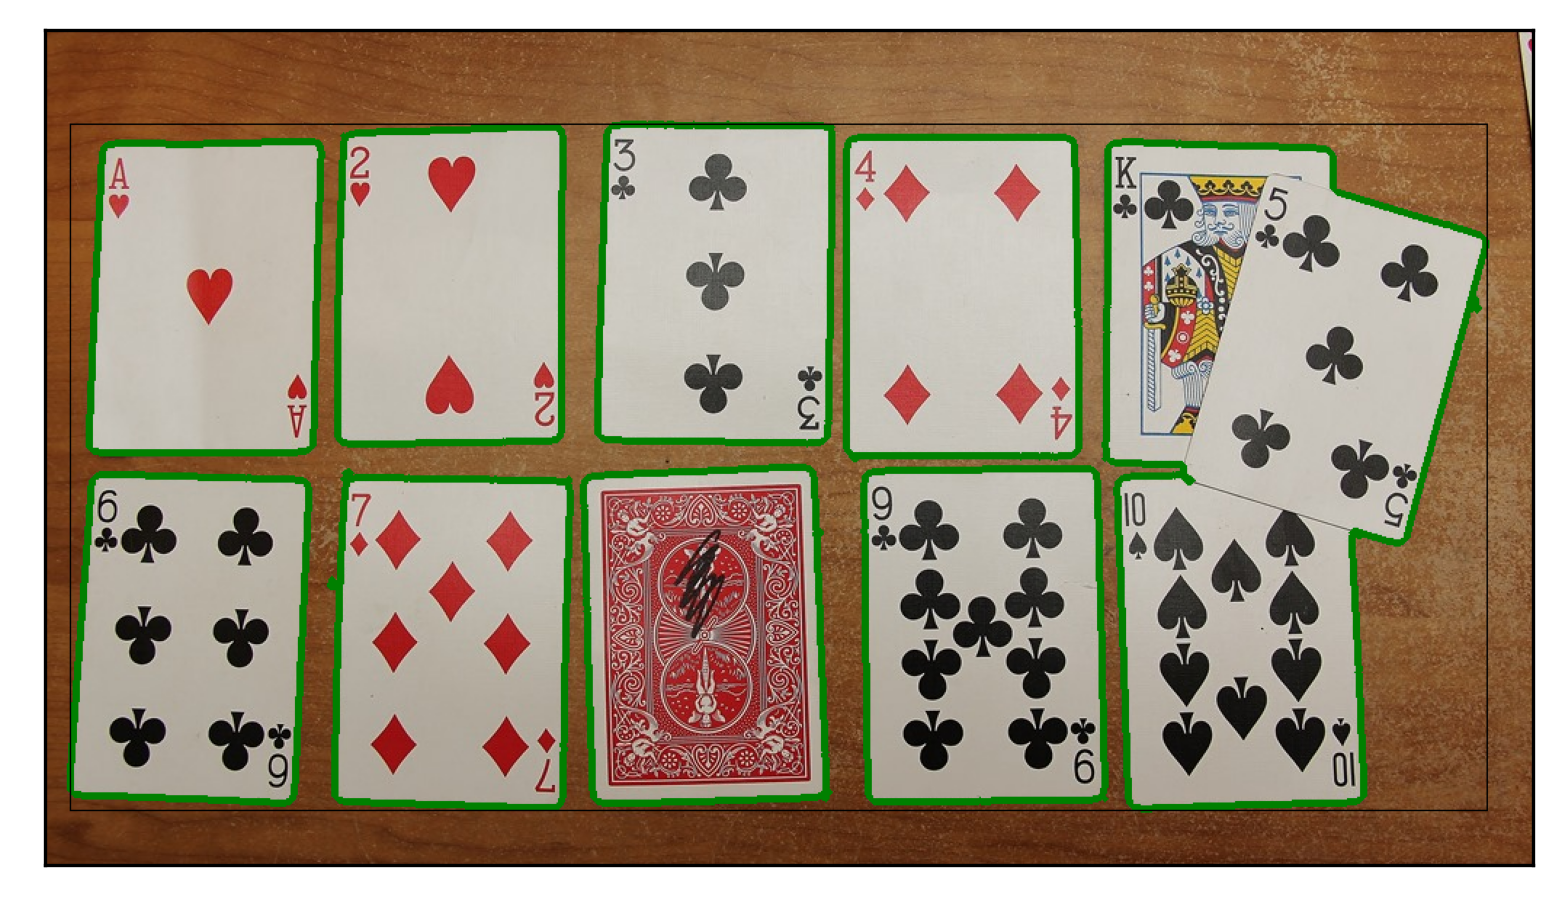

In [69]:
# image = cv.imread('elephant.png')
# image = cv.imread('klushka.jpeg')
# image = cv.imread('apple.jpg')
image = cv.imread('cards.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image, cmap='gray')
plt.xticks([]), plt.yticks([])
# gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
image_area = image.shape[0] * image.shape[1]
tresh = 0.02
grades = [0.7, 0.3]
canny = cv.Canny(image, 100, 250)
contours, hierarchy = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
filtered =[]
for c in contours:
    hull = cv.convexHull(c)
    area = cv.contourArea(hull)
    if area / image_area > tresh:
        filtered.append(c)
total_contour = np.vstack(filtered)
total_hull = cv.convexHull(total_contour)
cv.drawContours(image, total_contour, -1, (0, 128, 0), 3)
# plt.imshow(image)
x, y, w, h = cv.boundingRect(total_hull)
cv.rectangle(image, (x,y), (x+w, y+h), (0,0,0))
plt.imshow(image)
print(w*h/image_area*100,'%')
if w*h / image_area >= grades[0]:
    print('big')
elif w*h / image_area >= grades[1]:
    print('medium')
else:
    print('small')